In [10]:
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import numpy as np

In [11]:
def find_and_mark_faces(frame):
    small_frame = cv2.resize(frame, (0, 0), fx=RATIO, fy=RATIO)
    face_locations = face_recognition.face_locations(small_frame, 1, "hog")
    names = []
    face_encodings = face_recognition.face_encodings(small_frame, face_locations)
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, names):
            add_name_box(frame, left, top, bottom, right, name)

    return frame


def add_name_box(frame, left, top, bottom, right, name):
    inv_ratio = 1.0 / RATIO
    top = int(top * inv_ratio)
    right = int(right * inv_ratio)
    bottom = int(bottom * inv_ratio)
    left = int(left * inv_ratio)
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

In [7]:
# TODO, traverse directories and generate automatically
biden_face_encoding = face_recognition.face_encodings(
    face_recognition.load_image_file("biden.jpg"))[0]

obama_face_encoding = face_recognition.face_encodings(
    face_recognition.load_image_file("obama.jpg"))[0]

known_face_encodings = [
        biden_face_encoding,
        obama_face_encoding,
        ]

known_face_names = [
        "Joe Biden",
        "Barack Obama",
    ]

RATIO = 0.25

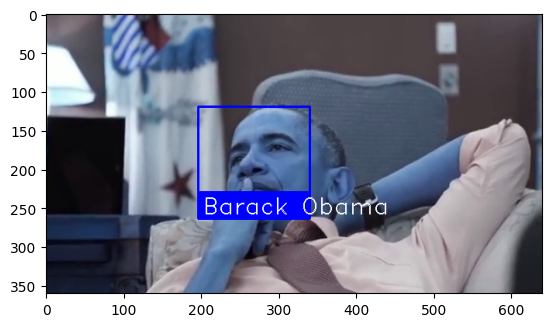

In [16]:
# Loading video for face detection
video_capture = cv2.VideoCapture('obama-biden.mp4')

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if True: #frame_count % 15 == 0:    
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        #face_locations = face_recognition.face_locations(frame)
        
        output_frame = find_and_mark_faces(frame)
        # Display the resulting image
        plt.imshow(output_frame)